<xarray.DataArray 'slhf' (latitude: 141, longitude: 141)>
array([[-176997.84 , -181675.9  , -188752.72 , ..., -147098.44 ,
        -123081.875, -129653.805],
       [ -96117.21 ,  -83709.19 , -151784.31 , ..., -165001.64 ,
        -151588.83 , -139111.06 ],
       [-124693.32 ,  -92053.805,  -61030.36 , ..., -178128.11 ,
        -172664.88 , -179048.95 ],
       ...,
       [-430715.8  , -430753.56 , -430241.8  , ..., -384395.1  ,
        -387828.5  , -393244.38 ],
       [-431137.66 , -430515.1  , -430205.16 , ..., -368107.8  ,
        -371406.84 , -396010.   ],
       [-431644.78 , -430996.7  , -430834.03 , ..., -353818.16 ,
        -365430.72 , -380337.38 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 104.5 104.8 105.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 0.75 0.5 0.25 0.0
Total SLHF Mean Across Cyclone Events:
<xarray.Dataset>
Dimensions:    (longitude: 141, latitude: 141)
Coordinates:
  * longitude  (longitude) f

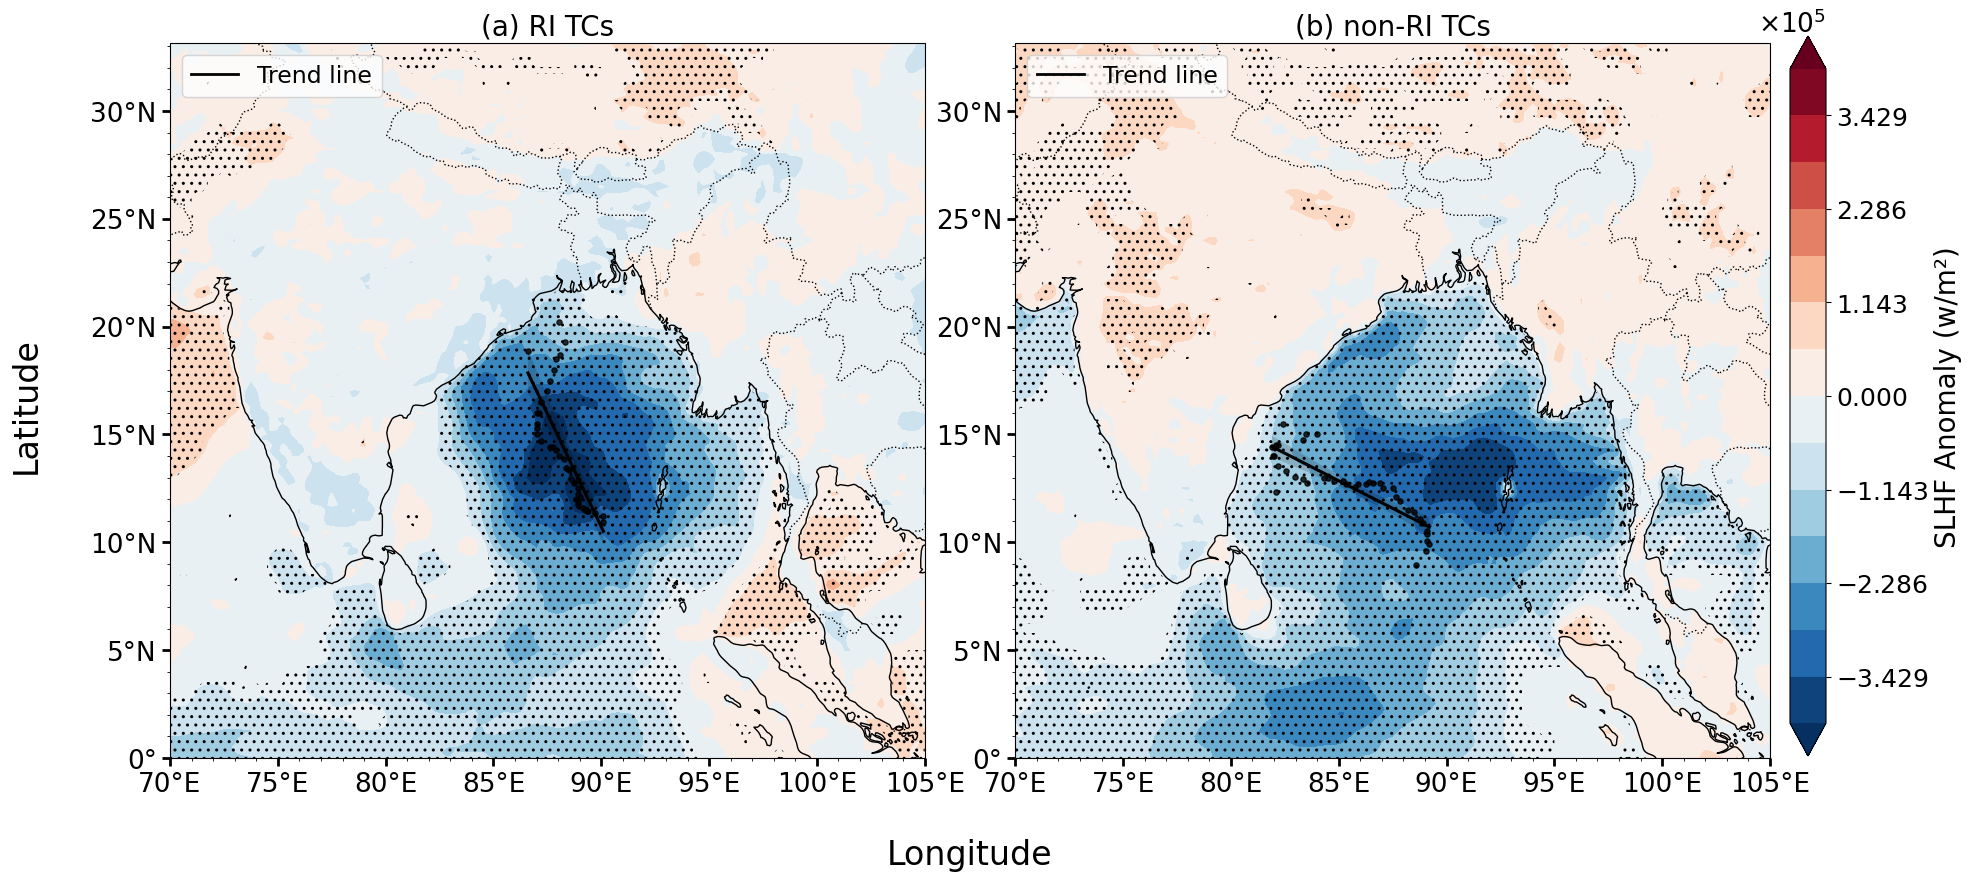

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm
import xarray as xr
from scipy.stats import ttest_1samp
import matplotlib.ticker as ticker
import pandas as pd
import cftime
import matplotlib.gridspec as gridspec
import seaborn as sns
# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 105
lat_min, lat_max = 0, 32
####################################################################################################################
#Premonsoon RI
# Define track data for multiple cyclones
cyclone_tracks1 = [
{
        'name': 'Fani',
        'intensification_range': (23,38),  # Add the rapid intensification range for Cyclone here
        'track': [(2.7, 89.7),(2.7, 89.7), (3.0, 89.4), (3.1, 89.3), (3.2, 89.2), (3.45, 89), (3.7, 88.8), (4.1, 88.8), (4.5, 88.8),
 (4.9, 88.7), (5.2, 88.6), (5.4, 88.5), (5.9, 88.5),(6.3, 88.5), (6.6, 88.2), (6.9, 87.9), (7.3, 87.9), 
 (7.3, 87.9), (7.4, 87.8), (7.7, 87.5), (8.2, 87.0),(8.3, 86.9), (8.4, 86.9), (8.5, 86.9), (8.6, 86.9),
 (8.7, 86.9), (9.2, 86.9), (9.7, 86.8), (10.1, 86.7), (10.4, 86.7), (10.8, 86.6), (11.1, 86.5), (11.7, 86.5),
 (12.3, 86.2), (12.6, 85.7), (13.0, 85.3), (13.3, 84.7), (13.4, 84.5), (13.5, 84.4), (13.6, 84.2), (13.9, 84.0),
 (14.1, 83.9), (14.2, 83.9), (14.5, 84.1), (14.9, 84.1), (15.1, 84.1), (15.2, 84.1), (15.5, 84.2), (15.9, 84.5),
 (16.2, 84.6), (16.7, 84.8), (17.1, 84.8), (17.5, 84.8), (17.8, 84.9), (18.2, 85.0), (18.6, 85.2), (19.1, 85.5),
 (19.6, 85.7), (20.2, 85.9), (20.6, 86.0), (21.1, 86.5), (21.5, 86.7), (21.9, 87.1), (22.5, 87.9), (23.1, 88.2),
 (23.6,  88.8), (24.3, 89.3),(24.75,90.0), (25.2, 90.7),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Amphan',
        'intensification_range': (16,29),  # Add the rapid intensification range for Cyclone here
        'track': [(10.4, 87.0), (10.7, 86.5), (10.9, 86.3), (10.9, 86.3), (10.9, 86.3), (11.0, 86.2), (11.1, 86.1), (11.3, 86.1), 
 (11.4, 86.0), (11.4, 86.0), (11.5, 86.0), (11.7, 86.0), (12.0, 86.0), (12.8, 86.2), (12.5, 86.1), (12.9, 86.4), 
 (13.2, 86.3), (13.3, 86.2), (13.4, 86.2), (13.7, 86.2), (14.0, 86.3), (14.5, 86.4), (14.9, 86.5), (15.2, 86.6), 
 (15.6, 86.7), (16.0, 86.8), (16.5, 86.9), (17.0, 86.9), (17.4, 87.0), (18.1, 87.1), (18.4, 87.2), (18.7, 87.2), 
 (19.1, 87.5), (19.8, 87.7), (20.6, 88.0), (21.4, 88.1), (21.9, 88.4), (22.7, 88.6), (23.3, 89.0), (24.2, 89.0), 
 (24.2, 89.3), (24.7, 89.5), (25.0, 89.6), (25.2,89.6), (25.4, 89.6),] # Add the track data for Cyclone here
       
    },    
{
        'name': 'Mocha',
        'intensification_range': (10,34),  # Add the rapid intensification range for Cyclone here
        'track': [(8.3, 89.5),(8.4,89.4), (8.5, 89.3),(8.5,89.15), (8.5, 89.0), (8.8, 88.9), (9.1, 88.7),(9.55,88.55), (10.0, 88.4),(10.4,88.3), (10.8, 88.2),(11,88.15), (11.2, 88.1),
 (11.4, 88.0), (11.6, 88.0), (11.8, 88.0), (12.2, 88.0), (12.5, 88.1), (12.7, 88.1), (12.9, 88.1), (13.2, 88.1),
 (13.6, 88.2), (14.0, 88.3), (14.3, 88.4), (14.6, 88.6), (14.8, 88.7), (15.1, 88.8), (15.2, 88.9), (15.4, 89.1),
 (15.7, 89.5), (16.0, 90.0), (16.4, 90.3), (16.9, 90.8), (17.4, 90.9), (17.9, 91.0), (18.3, 91.3), (18.7, 91.5),
 (19.3, 91.9), (19.9, 92.5), (20.5, 92.9), (21.1, 93.3), (21.8, 93.8), (22.7, 94.6), (23.5, 95.3), (23.9, 97.8),
 ] # Add the track data for Cyclone here
       
    }, 
{
        'name': 'Mala',
        'intensification_range': (17,32),  # Add the rapid intensification range for Cyclone here
        'track': [(9.5, 90.5), (9.5, 90.5), (9.5, 90.0), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.5, 89.0), (10.5, 89.0),
 (11.0, 89.0), (11.0, 89.5), (11.5, 90.0), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.5, 90.5), (12.5, 90.5),
 (12.5, 90.5), (13.0, 90.5), (13.0, 90.5), (13.0, 90.5), (13.5, 90.5), (14.0, 91.0), (14.5, 91.5), (15.0, 92.0), (15.3, 92.3), 
 (15.5, 92.5), (16.0, 93.0), (16.0, 93.0), (16.5, 93.5), (16.5, 93.5), (17.0, 94.0), (17.5, 94.5), (18.0, 95.0), (18.5, 95.5),
 (18.5, 95.5), (19.0, 96.0),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Nargis',
        'intensification_range':  (2,10),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0, 87.0), (12.0, 87.0), (12.0, 86.5), (12.0, 86.5), (12.0, 86.5), (12.5, 86.0), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5),
        (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.5, 85.5), (13.5, 85.5), 
        (13.5, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 86.0), (14.0, 86.0), (14.5, 86.5), (14.5, 86.5), (14.5, 87.0), 
        (14.5, 87.0), (15.0, 87.5), (15.0, 87.5), (15.0, 87.5), (15.5, 88.0), (15.5, 89.0), (16.0, 89.5), (16.0, 90.0), (16.0, 90.5), 
        (16.0, 91.0), (16.0, 91.5), (16.0, 92.0), (16.0, 92.5), (16.0, 93.0), (16.0, 93.5), (16.0, 94.0), (16.0, 94.3), (16.0, 95.0), 
        (16.5, 95.5), (16.5, 95.5), (16.5, 95.5), (17.0, 96.0), (17.5, 96.5), (18.0, 97.0),]
     
   },
{
        'name': 'Giri',
        'intensification_range': (0,16),  # Add the rapid intensification range for Cyclone here
        'track': [(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(18.0,92),(18.0,92),
 (18.0,92.0),(18.5,92.5),(18.5,92.5),(19.0,93),(19.0,93),(19.5,93.5),(19.8,93.5),(20.0,93.5),
 (20.5,94),(20.5,94),(21.0,94.5),(21.5,95),(22.0,95.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Phailin',
        'intensification_range': (9,28),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0,96.0),(12.0,95.5),(12.0,95),(12.0,94.5),(12.25,94.25),(12.5,94.0),(13.0,93.5),(13.0,93.5),(13.0,93.0),(13.5,92.5),
 (13.5,92.5),(13.6,92.5),(14.0,92.0),(14.0,92.0),(14.5,91.5),(14.5,91.0),(15.0,90.5),(15.0,90.5),
 (15.5,90.0),(15.5,90.0),(15.5,89.5),(15.5,89.0),(16.0,88.5),(16.0,88.5),(16.2,88.3),(16.5,88.0),
 (16.8,87.7),(16.9,87.2),(17.0,87.0),(17.1,86.8),(17.5,86.5),(17.8,86.0),(18.1,85.7),(18.6,85.4),
 (18.7,85.2),(19.1,85.2),(19.5,84.8),(20.0,84.5),(20.5,84.5),(21.0,84.0),(21.5,84.0),(21.8,83.8),
 (22.5,83.8),(22.75,83.65),(23.0,83.5),(23.25,83.75),(23.5,84.0),(24.0,84.1),(24.5,84.2),]  # Add the track data for Cyclone 
       
    },
{
        'name': 'Madi',
        'intensification_range': (0,13),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0,84.0),(10.0,84.0),(10.1,84.0),(10.2,84.0),(10.3,84.0),(10.4,84.0),(10.45,84.05),(10.5,84.1),(10.5,84.1),(10.7,84.2),(10.8,84.3),
 (11.0,84.4),(11.0,84.5),(11.2,84.5),(11.5,84.6),(11.8,84.6),(12.0,84.6),(12.3,84.7),(12.6,84.7),
 (13.0,84.7),(13.2,84.7),(13.4,84.7),(13.6,84.7),(13.8,84.7),(14.0,84.7),(14.3,84.7),(14.4,84.7),
 (14.6,84.7),(14.7,84.7),(14.8,84.8),(14.8,84.8),(15.0,85.0),(15.3,85.3),(15.4,85.3),(15.7,85.3),
 (15.4,85.0),(15.1,84.8),(14.9,84.7),(14.6,84.6),(14.3,84.2),(14.0,83.8),(13.7,83.5),(13.5,83.4),
 (13.3,83.3),(13.1,83.5),(12.9,82.7),(12.7,82.35),(12.5,82.0),(12.0,81.5),(11.5,81.2),(11.0,80.7),(10.5,80.0),(10.25,78.9),
 (10.0,78.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Hudhud',
        'intensification_range': (33,42),  # Add the rapid intensification range for Cyclone here
        'track': [(11.5, 95.0), (11.7, 94.8), (11.85,94.4),(12.0, 94.0), (12.0,93.75),(12.0, 93.5),(12.1,93.25), (12.2, 93.0), (12.3, 92.9), (12.5, 92.5), (12.7, 91.7),
 (12.8, 91.0), (13.0, 90.5), (13.2, 90.2), (13.5, 89.6), (13.7, 89.2), (13.8, 89.0), (13.9, 88.8), (14.6, 88.6),
 (14.1, 88.4), (14.1, 88.1), (14.1, 87.9), (14.3, 87.7), (14.4, 87.6), (14.7, 87.2), (14.8, 87.0), (15.0, 86.8),
 (15.2, 86.7), (15.4, 86.5), (15.5, 86.4), (15.7, 86.1), (15.9, 85.7), (16.0, 85.4), (16.1, 85.1), (16.1, 85.0),
 (16.2, 84.8), (16.2, 84.8), (16.4, 84.7), (16.7, 84.4), (17.2, 84.2), (17.4, 83.8), (17.6, 83.4), (17.8, 83.0),
 (18.0, 82.7), (18.3, 82.5), (18.7, 82.3), (18.7, 82.3), (19.5, 81.5), (20.5, 81.5), (20.7, 81.5),(21.0,81.5), (21.3, 81.5),(21.8,81.5),
 (22.3, 81.5),(23.55,81.5), (24.8, 81.5), (25.1, 81.6), (25.6, 81.7), (26.3, 81.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Titli',
        'intensification_range': (8,23),  # Add the rapid intensification range for Cyclone here
        'track': [(14.0, 88.8), (14.0, 88.8),(14.15,88.5), (14.3, 88.2),(14.4,87.9), (14.5, 87.6),(14.6,87.35), (14.7, 87.1), (14.7, 86.9), (14.8, 86.7), (14.9, 86.6),
 (15.1, 86.4), (15.3, 86.2), (15.5, 86.0), (15.7, 85.8), (16.0, 85.8), (16.5, 85.8), (17.0, 85.6), (17.3, 85.4),
 (17.5, 85.3), (17.7, 85.2), (18.2, 85.1), (18.6, 84.7), (18.8, 84.4), (19.0, 84.1), (19.3, 83.8), (19.6, 83.8), 
 (19.9, 83.7), (20.1, 84.0), (20.3, 84.3),(20.4,84.5), (20.5, 84.7), (20.6, 84.9), (20.8, 85.2), (20.9, 85.5), (21.2, 86.1), (21.55,86.65),
 (21.9, 87.2), (22.1, 87.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Bulbul',
        'intensification_range': (6,18),  # Add the rapid intensification range for Cyclone here
        'track': [(13.1, 91.5), (13.1, 91.0), (13.1, 90.7),(13.15,90.4), (13.2, 90.1),(13.25,89.95), (13.3, 89.8),(13.35,89.75), (13.4, 89.7), (13.4, 89.6), (13.4, 89.4),
 (13.45,89.35),(13.5, 89.3),(13.65,89.3), (13.8, 89.3),(14.0,89.3), (14.2, 89.3), (14.7, 89.3), (15.3, 88.7), (15.5, 88.4), (15.9, 88.0), (16.2, 87.9), 
 (16.4, 87.8), (16.6, 87.7), (16.9, 87.6), (17.2, 87.6), (17.6, 87.6), (18.1, 87.6), (18.5, 87.6), (19.2, 87.7), 
 (19.3, 87.6), (19.6, 87.7), (20.0, 87.6), (20.4, 87.6), (20.6, 87.8), (20.9, 87.9), (21.2, 88.1), (21.4, 88.3), 
 (21.6, 88.6), (21.9, 89.1), (22.1, 89.5), (22.2, 89.7), (22.3, 90.0), (22.4, 90.1), (22.5, 90.4),(22.6,90.8),(22.7, 91.2), (22.9,91.55),
 (23.1, 91.9),] # Add the track data for Cyclone here
       
    },  
{
        'name': 'Sidr',
        'intensification_range':  (1,18),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0, 92.0), (10.0, 92.0), (10.0, 92.0), (10.5, 91.5), (10.5, 91.5), (10.5, 91.5), (10.5, 91.0), (11.0, 90.5), (11.0, 90.5),
      (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (12.0, 89.5), (12.0, 89.5), (12.0, 89.5), (13.0, 89.5), (13.0, 89.5),
      (13.0, 89.5), (13.5, 89.5), (14.0, 89.5), (14.5, 89.5), (14.5, 89.5), (15.0, 89.5), (15.5, 89.5), (16.0, 89.0), (16.0, 89.0), 
      (16.5, 89.0), (17.0, 89.0), (17.5, 89.0), (18.0, 89.0), (19.5, 89.0), (20.0, 89.0), (21.0, 89.0), (21.5, 89.5), (22.5, 90.5), 
      (23.5, 91.0), (23.5, 91.0), (24.5, 91.5),]
     
    },


    
    # Add more cyclone track data lists as needed
]

# Convert date strings to datetime objects
start_date_amphan = cftime.DatetimeGregorian(2020,5,18)
end_date_amphan = cftime.DatetimeGregorian(2020, 5, 19)
start_date_mocha = cftime.DatetimeGregorian(2023, 5, 11)
end_date_mocha = cftime.DatetimeGregorian(2023, 5, 12)
start_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
end_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
start_date_fani = cftime.DatetimeGregorian(2019, 4, 29)
end_date_fani = cftime.DatetimeGregorian(2019, 4, 30)
start_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
end_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
start_date_giri = cftime.DatetimeGregorian(2010,10,20)
end_date_giri= cftime.DatetimeGregorian(2010, 10, 21)
start_date_phailin = cftime.DatetimeGregorian(2013, 10, 10)
end_date_phailin = cftime.DatetimeGregorian(2013, 10, 11)
start_date_madi = cftime.DatetimeGregorian(2013, 12, 6)
end_date_madi = cftime.DatetimeGregorian(2013, 12, 7)
start_date_hudhud = cftime.DatetimeGregorian(2014, 10, 10)
end_date_hudhdud= cftime.DatetimeGregorian(2014, 10, 10)
start_date_titli = cftime.DatetimeGregorian(2018, 10, 9)
end_date_titli = cftime.DatetimeGregorian(2018, 10, 10)
start_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
end_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
start_date_sidr = cftime.DatetimeGregorian(2007, 11, 12)
end_date_sidr = cftime.DatetimeGregorian(2007, 11, 13)
# Load the dataset
slhf_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/slhf_2005-2023.nc')
# Access the SLHF variable (replace 'SLHF_variable_name' with the actual variable name)
slhf_variable = slhf_data['slhf']

# Calculate the mean across the time dimension
slhf_mean = slhf_variable.mean(dim='time')
# Print the resulting mean dataset
print(slhf_mean)
slhf_amphan = slhf_data.sel(time=slice(str(start_date_amphan), str(end_date_amphan)))
slhf_mocha = slhf_data.sel(time=slice(str(start_date_mocha), str(end_date_mocha)))
slhf_mala = slhf_data.sel(time=slice(str(start_date_mala), str(end_date_mala)))
slhf_fani = slhf_data.sel(time=slice(str(start_date_fani), str(end_date_fani)))
slhf_nargis = slhf_data.sel(time=slice(str(start_date_nargis), str(end_date_nargis)))
slhf_giri = slhf_data.sel(time=slice(str(start_date_giri), str(end_date_giri)))
slhf_phailin = slhf_data.sel(time=slice(str(start_date_phailin), str(end_date_phailin)))
slhf_madi = slhf_data.sel(time=slice(str(start_date_madi), str(end_date_madi)))
slhf_hudhud = slhf_data.sel(time=slice(str(start_date_hudhud), str(end_date_hudhdud)))
slhf_titli = slhf_data.sel(time=slice(str(start_date_titli), str(end_date_titli)))
slhf_bulbul = slhf_data.sel(time=slice(str(start_date_bulbul), str(end_date_bulbul)))
slhf_sidr = slhf_data.sel(time=slice(str(start_date_sidr), str(end_date_sidr)))

# Concatenate the selected cyclone events along the time axis
slhf_combined = xr.concat([slhf_amphan, slhf_mocha,slhf_mala,slhf_fani,
                            slhf_nargis, slhf_giri, slhf_phailin, slhf_madi, slhf_hudhud, slhf_titli, slhf_bulbul, slhf_sidr], dim='time')

# Calculate the mean SLHF across the combined time axis
slhf_total_mean = slhf_combined.mean(dim='time')

print("Total SLHF Mean Across Cyclone Events:")
print(slhf_total_mean)

# Calculate the anomaly (difference between total mean across cyclone events and overall mean)
slhf_anomaly = slhf_total_mean - slhf_mean

print("SLHF Anomaly:")
print(slhf_anomaly)
slhf_anomaly_da = slhf_anomaly['slhf']


################################################################################################################
# Non-RI
# Define track data for multiple cyclones
cyclone_tracks2 = [
{
        'name': 'Asani',
        'track': [(9.4, 91.3),(9.85,90.85), (10.3, 90.4),(10.55,90.25), (10.8, 90.1),(11.05,89.7), (11.3, 89.3), (11.5, 89.0),
         (11.8, 88.7), (12.0, 88.4), (12.3, 88.2), (12.7, 87.8), (13.1, 87.5), (13.5, 87.1), (13.9, 86.8),
         (14.2, 86.5), (14.6, 86.3), (14.7, 86.0), (14.9, 85.8), (15.0, 85.5), (15.1, 85.2), (15.2, 84.9),
         (15.3, 84.6), (15.4, 84.0), (15.5, 83.5), (15.6, 83.1), (15.7, 82.8), (15.8, 82.4), (15.9, 82.1),
         (16.0, 81.9), (16.1, 81.8), (16.1, 81.6), (16.2, 81.5), (16.2, 81.4), (16.3, 81.4), (16.3, 81.3),
         (16.3, 81.2),(16.25,81.05), (16.2, 80.9),]
    },
{
        'name': 'Yaas',
        'track': [(16.1, 90.2),(16.15,90.05), (16.2, 89.9),(16.25,89.8), (16.3, 89.7), (16.3, 89.7), (16.3, 89.7), 
      (16.5, 89.6), (16.4, 89.6), (16.8, 89.5), (17.1, 89.3), (17.4, 89.2), (17.6, 89.0), (17.8, 88.9),
      (18.0, 88.6), (18.3, 88.3), (18.7, 88.0), (19.1, 88.1), (19.5, 88.0), (19.8, 87.9), (20.1, 87.8), 
      (20.4, 87.6), (20.8, 87.3), (21.2, 87.1), (21.4, 86.9), (21.6, 86.7), (21.8, 86.6), (22.2, 86.2), 
      (22.5, 86.0),(22.65,85.9), (22.8, 85.8), (23.1, 85.7), (23.5, 85.6),(23.9,85.45), (24.3, 85.3),(24.45,85.05), 
      (24.7, 84.8),]
       
    },
{
        'name': 'Mora',
        'track': [(14.0, 88.5), (14.5, 89.5), (15.0, 90.0), (15.4, 90.5), (15.7, 90.7), (16.0, 91.0), (16.3, 91.2),
      (16.6, 91.3), (17.0, 91.3), (17.3, 91.3), (17.8, 91.4), (18.3, 91.5), (18.6, 91.5), (18.8, 91.5), 
      (20.0, 91.6), (20.3, 91.6), (21.1, 91.8), (21.8, 91.9), (22.8, 91.9), (23.6, 92.1), (24.2, 92.2), 
      (24.75,92.3), (25.3, 92.4),]
    },

{
        'name': 'Laila',
        'track': [(10.5,88.5),(10.75,88.25),(11.0,88.0),(11.25,87.75),(11.5,87.5),(11.5,87),(11.5,86.5),(12.0,85.5),(12.5,84.5),(13.0,84.0),(13.0,83.5),
       (13.0,83.0),(13.0,82.5),(13.0,82.0),(13.5,82.0),(13.5,82.0),(13.5,81.5),(14.0,81.5),(14.0,81.5),
       (14.0,81.5),(14.5,81.0),(14.5,81.0),(15.0,81.0),(15.5,80.5),(15.7,80.5),(15.8,80.5),(16.0,80.5),
       (16.0,80.5),(16.0,80.5),(16.0,80.7),(16.2,80.8),(16.5,81.0),(17.0, 81.5),]
     
   },
{
        'name': 'Aila',
        'track': [(16.5, 88.0), (16.5, 88.0), (16.5, 88.0), (16.75, 88.25), (17.0, 88.5), (17.0, 88.5), (17.0, 88.5),
      (18.0, 88.5), (18.0, 88.5), (18.0, 88.5), (18.5, 88.5), (19.0, 88.5), (19.0, 88.5), (20.0, 88.0), 
      (20.0, 88.0), (20.5, 88.0), (21.5, 88.0), (22.0, 88.0), (22.5, 88.0), (23.0, 88.0), (23.5, 88.0), 
      (24.0, 88.0), (25.0, 88.0), (25.5, 88.0), (27.0, 88.5),]

     
   },
{
        'name': 'Mandous',
        'track': [(8.2, 88.2),(8.3,87.6), (8.4, 87.0), (8.6, 86.3), (8.7, 85.7), (8.7, 85.5),(8.8,85.25),
           (8.9, 85.0),(9.05,84.8), (9.2, 84.6), (9.3, 84.4), (9.4, 84.1), (9.5, 83.8), (9.7, 83.5),
           (9.8, 83.2), (10.1, 82.9), (10.4, 82.6), (10.6, 82.3), (10.7, 82.0), (11.0, 81.7), (11.1, 81.5),
           (11.4, 81.3), (11.7, 81.0), (12.0, 80.8), (12.2, 80.6), (12.5, 80.3), (12.8, 80.0), (12.9, 79.7),
           (12.8, 79.5), (12.7, 79.3),]
    },
{
        'name': 'Nivar',
        'track': [(8.5, 85.3), (9.3, 84.5), (9.5, 84.2), (9.6, 84.0),(9.7,83.8), (9.8, 83.6),(9.9,83.45), (10.0, 83.3),
       (10.0,83.15), (10.0, 83.0), (10.0, 83.0), (10.0, 82.7), (10.0, 82.6), (10.1, 82.5), (10.1, 82.4), (10.2, 82.3),
       (10.3, 82.2), (10.5, 82.0), (10.7, 81.7), (11.0, 81.3), (11.2, 81.0), (11.4, 80.7), (11.7, 80.4),
       (12.0, 80.1), (12.1, 79.9), (12.3, 79.7), (12.6, 79.4), (12.9, 79.3), (13.3, 79.3), (13.6, 79.4), 
       (13.8,79.5), (14.0, 79.6),]
       
    },
{
        'name': 'Phethai',
        'track': [(6.5, 88.7), (6.7, 88.6), (6.8, 88.5),(7.05,88.35), (7.3, 88.2), (7.45,88.1), (7.6, 88.0),(7.9,87.8), (8.2, 87.6), (8.5, 87.4), (8.5, 87.4),(8.55,87.1),
        (8.6, 86.8), (8.7,86.5), (8.8, 86.2), (8.9,85.75), (9.0, 85.5), (9.2, 85.2), (9.4, 85.1), (9.85,85), (10.3, 84.9), (10.7, 84.7), (11.0, 84.6), (11.1, 84.5), (11.3, 84.3), 
        (11.8, 84.1), (12.2, 83.9), (12.6,83.6), (13.3, 83.0), (13.8, 82.7), (14.0, 82.5), (14.5, 82.2), (15.2, 82.2), (15.8, 82.2), (16.2, 82.2), 
        (16.7, 82.3), (16.9, 82.4), (17.3, 82.5), (17.5, 82.5),]
       
    },
{
        'name': 'Gaja',
        'track':[(11.7, 92.5), (12.0, 92.0), (12.3,92.4), (12.6, 90.8), (12.8,93.5), (13.0, 89.9), (13.2,89.6), (13.4, 89.3), (13.5, 88.9),
      (13.5, 88.5), (13.5, 88.2), (13.5, 88.0), (13.5, 87.7), (13.4, 87.4), (13.5, 87.2), (13.3, 87.1), (13.1, 87.0),
      (12.9, 86.9), (12.9, 86.9), (12.6, 87.3), (12.9, 87.5), (13.2, 87.5), (13.2, 87.3), (13.2, 87.2), (13.3, 87.1), 
      (13.5, 86.6), (13.4, 86.4), (13.4, 86.0), (13.2, 85.8), (13.2, 85.6), (13.1, 85.5), (13.1, 85.3), (13.0, 85.1), 
      (12.8, 84.8), (12.6, 84.6), (12.4, 84.2), (12.2, 84.2), (12.0, 83.8), (11.8, 83.4), (11.5, 83.2), (11.3, 82.6),
      (11.2, 82.0), (11.0, 81.5), (10.8, 81.2), (10.6, 80.7), (10.5, 80.3), (10.4, 79.7), (10.4, 79.2), (10.4, 78.5), 
      (10.5, 77.6), (10.3,77), (10.1, 76.4), (10,75.85), (9.9, 75.3), (9.85,74.8), (9.8, 74.3), (9.8, 73.7), (9.8, 73.2),
      (9.85,72.45), (9.9, 71.7), (10,71.1), (10.1, 70.5), (10.2,70.05), (10.3, 69.6), (10.4, 69.4), (10.5, 69.0), (10.6,68.75),(10.7, 68.5),
      (10.75,68), (10.8, 67.5),(10.9,67.05), (11.0, 66.6), (11.1, 66.3), (11.2, 65.8), (11.2, 65.4), (11.2, 65.0),]

       
    },
{
        'name': 'Vardah',
        'track': [(8.5, 91.0), (8.5, 90.5), (9,90.5), (9.5, 90.5), (9.65,90.5), (9.8, 90.5), 
        (9.8, 90.5), (9.8, 90.5), (9.9,90.5), (10.0, 90.5), (10.4,90.5), (10.8, 90.5),
        (11,90.5), (11.2, 90.5), (11.5, 90.5), (11.5, 90.5), (11.5, 90.5), (11.7, 90.5),
        (11.7, 90.5), (11.8, 90.5), (12.0, 90.5), (12.0, 90.4), (12.1, 90.4), (12.1, 90.3),
        (12.2, 90.3), (12.2, 90.0), (12.2, 89.9), (12.3, 89.6), (12.5, 89.0), (12.6, 88.4),
        (12.7, 88.0), (13.0, 87.4), (13.1, 86.8), (13.2, 86.4), (13.3, 85.9), (13.3, 85.3), 
        (13.3, 85.0), (13.3, 84.7), (13.1, 84.3), (13.1, 83.7), (13.1, 83.3), (13.3, 83.0), 
        (13.3, 82.5), (13.1, 82.3), (13.2, 81.9), (13.2, 81.6), (13.2, 81.2), (13.2, 80.7), 
        (13.1, 80.3), (13.0, 79.9), (12.9, 79.5), (12.7, 79.1), (12.6,78.55), (12.5, 78.0),]

       
    },    
{
        'name': 'Lehar',
        'track':[(8.5,96.5),(8.75,96.25) ,(9.0,96.0),(9.5,95.5), (10.0,95.0),(10.0,95.0),(10.5,94.5),(10.7,94.0),(11.0,93.5),(11.0,93.5),
       (11.5,93.0),(11.5,92.5),(12.0,92.5),(12.0,92),(12.0,91.5),(12.0,91.5),(12.5,91.5),(12.5,91.0),(12.5,91.0),
       (12.5,91.0),(12.5,90.5),(12.5,90.0),(12.5,89.5),(13.0,89.0),(13.0,88.5),(13.0,88.5),(13.1,88.0),
       (13.2,87.5),(13.5,87.0),(13.5,86.5),(14.0,86.0),(14.0,85.5),(14.5,85.0),(14.5,84.5),(15.0,84.0),
       (15.0,83.5),(15.5,82.0),(15.7,81.7),(15.7,81.3),(15.9,81.0),(16.0,80.8),]
       
    }, 
{
        'name': 'Helen',
        'track': [(14.5, 86.5), (14.5, 86.0), (14.5, 85.5), (14.75, 85.25), (15.0, 85.0), (15.0, 85.0), (15.0, 84.5),
       (15.0, 84.25), (15.0, 84.0), (15.0, 84.0), (15.2, 84.0), (15.2, 84.0), (15.3, 83.9), (15.3, 83.9),
       (15.4, 83.7), (15.5, 83.6), (15.6, 83.5), (15.8, 83.4), (15.9, 83.3), (16.0, 83.1), (16.1, 82.9),
       (16.1, 82.7), (16.2, 82.7), (16.2, 82.3), (16.2, 81.9), (16.2, 81.7), (16.2, 81.3), (16.1, 81.2),
       (15.9, 80.7), (15.9, 80.55),(15.9, 80.4),]
    },
{
        'name': 'Thane',
        'track':[(8.5,88.5), (8.75,88.25), (09.0,88.0),(9.25,87.75),(09.5,87.5),(09.5,87.5), (10.0,87.5),(10.25,87.5),
       (10.5,87.5),(10.75, 87.5), (11.0,87.5),(11.0,87.5),(11.5,87.5),(12.0,87.0),(12.0,87.0),(12.2,86.7),(12.5,86.5),
       (12.5,86.5),(12.5,86.0),(12.5,86.0),(12.5,85.5),(12.5,85.5),(12.5,85.0),(12.5,85.0),(12.5,84.5),
       (12.5,84.0),(12.5,84.0),(12.5,83.5),(12.3,83.0),(12.0,82.5),(12.0,82.0),(12.0,81.7),(12.0,81.3),
       (12.0, 81.0),(11.8,80.6), (11.8, 80.3), (11.6, 79.9), (11.6, 79.5), (11.6 ,79.0), (11.6, 78.6), 
       (11.6, 78.2),]
     
    },
{
        'name': 'Jal',
        'track': [(8.0,92.0),(8.5,91.0),(8.5,90.5),(8.5,90.25),(8.5,90.0),(8.5,89.75),(8.5,89.5),(8.75,89),(9.0,88.5),(9.0,88.0), (9.0,87.5),(9.0,87.5),
     (9.5,87.0),(9.5,87.0),(10.0,86.5),(10.0,86.0),(10.0,85.5),(10.0,85.5),(10.0,85.0),(10.0,85.0),
     (11.0,84.5),(11.0,84.5),(11.0,84.0),(11.0,84.0),(11.0,83.5),(12.0,83.0),(12.0,82.5),(12.0,81.5),
     (13.0,81.0),(13.0,80.5),(13.0,80.0), (13.5,79.5), (14.0,79.0),(15.0,78.0),]

     
   },

    
    # Add more cyclone track data lists as needed
]
# Convert date strings to datetime objects
start_date_asani = cftime.DatetimeGregorian(2022,5,7)
end_date_asani= cftime.DatetimeGregorian(2022, 5, 8)
start_date_yaas = cftime.DatetimeGregorian(2021, 5, 23)
end_date_yaas = cftime.DatetimeGregorian(2021, 5, 24)
start_date_mora = cftime.DatetimeGregorian(2017, 5, 28)
end_date_mora = cftime.DatetimeGregorian(2017, 5, 29)
start_date_laila = cftime.DatetimeGregorian(2010, 5, 17)
end_date_laila = cftime.DatetimeGregorian(2010, 5, 18)
start_date_aila = cftime.DatetimeGregorian(2009, 5, 23)
end_date_aila = cftime.DatetimeGregorian(2009, 5, 24)
start_date_mandous = cftime.DatetimeGregorian(2022,12,6)
end_date_mandous = cftime.DatetimeGregorian(2022, 12, 7)
start_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
end_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
start_date_phethai = cftime.DatetimeGregorian(2018, 12, 14)
end_date_phethai = cftime.DatetimeGregorian(2018, 12, 15)
start_date_gaja = cftime.DatetimeGregorian(2018,11, 11)
end_date_gaja = cftime.DatetimeGregorian(2018,11, 12)
start_date_vardah = cftime.DatetimeGregorian(2016, 12, 10)
end_date_vardah = cftime.DatetimeGregorian(2016, 12, 11)
start_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
end_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
start_date_helen = cftime.DatetimeGregorian(2013, 11, 19)
end_date_helen = cftime.DatetimeGregorian(2013, 11, 20)
start_date_thane = cftime.DatetimeGregorian(2011, 12, 26)
end_date_thane = cftime.DatetimeGregorian(2011, 12, 27)
start_date_jal = cftime.DatetimeGregorian(2010, 11, 5)
end_date_jal = cftime.DatetimeGregorian(2010, 11, 6)
# Load the slhf data from the downloaded NetCDF file

slhf_asani = slhf_data.sel(time=slice(str(start_date_asani), str(end_date_asani)))
slhf_yaas = slhf_data.sel(time=slice(str(start_date_yaas), str(end_date_yaas)))
slhf_mora = slhf_data.sel(time=slice(str(start_date_mora), str(end_date_mora)))
slhf_laila = slhf_data.sel(time=slice(str(start_date_laila), str(end_date_laila)))
slhf_aila = slhf_data.sel(time=slice(str(start_date_aila), str(end_date_aila)))
slhf_mandous = slhf_data.sel(time=slice(str(start_date_mandous), str(end_date_mandous)))
slhf_nivar= slhf_data.sel(time=slice(str(start_date_nivar), str(end_date_nivar)))
slhf_phethai = slhf_data.sel(time=slice(str(start_date_phethai), str(end_date_phethai)))
slhf_gaja = slhf_data.sel(time=slice(str(start_date_gaja), str(end_date_gaja)))
slhf_vardah = slhf_data.sel(time=slice(str(start_date_vardah), str(end_date_vardah)))
slhf_lehar = slhf_data.sel(time=slice(str(start_date_lehar), str(end_date_lehar)))
slhf_helen = slhf_data.sel(time=slice(str(start_date_helen), str(end_date_helen)))
slhf_thane = slhf_data.sel(time=slice(str(start_date_thane), str(end_date_thane)))
slhf_jal = slhf_data.sel(time=slice(str(start_date_jal), str(end_date_jal)))

# Concatenate the selected cyclone events along the time axis
slhf_combinednri = xr.concat([slhf_asani, slhf_yaas,slhf_mora,slhf_laila,
                            slhf_aila, slhf_mandous, slhf_nivar, slhf_phethai, slhf_gaja, slhf_vardah, slhf_lehar, slhf_helen,slhf_thane,slhf_jal ], dim='time')

# Calculate the mean SLHF across the combined time axis
slhf_total_meannri = slhf_combinednri.mean(dim='time')

print("Total SLHF Mean Across Cyclone Events:")
print(slhf_total_meannri)

# Calculate the anomaly (difference between total mean across cyclone events and overall mean)
slhf_anomalynri = slhf_total_meannri - slhf_mean

print("SLHF Anomaly:")
print(slhf_anomalynri)
slhf_anomalynri_da = slhf_anomalynri['slhf']

#######################################################################################################################
# Create a new figure with two subplots
fig = plt.figure(figsize=(20, 9))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.12)
####################################################################################################################################
# Subplot 1: Cyclone Tracks and slhf slhfaly
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max])
ax1.add_feature(cfeature.LAND, facecolor='darkgrey')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for cyclone plotting and slhf slhfaly
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(slhf_anomaly_da.longitude, slhf_anomaly_da.latitude)
levels = np.linspace(-400000, 400000, 15) 
slhf_contour1 = ax1.contourf(lon, lat, slhf_anomaly_da, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',extend='both')

# Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks1]
print(num_timesteps_list)

# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)
# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []
for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks1:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
#ax2.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
#ax2.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax1.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='black', ci=95,scatter_kws={'s': 14})

# Legend handles for custom legend entries
ri_line = mlines.Line2D([], [], color='red', linewidth=2, label='RI Phase')
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='black', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax1.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax1.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax1.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax1.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax1.set_title('(a) RI TCs', fontsize=20)

import scipy.stats as stats
slhf_combinedri1 = slhf_combined['slhf']
# Assuming you have a reference period to compare against, calculate the mean and standard deviation
slhf_data=slhf_data['slhf']
mean_climatology =slhf_data.mean(dim='time')
std_climatology = slhf_data.std(dim='time')

# Perform a one-sample t-test
t_stat, p_values = stats.ttest_1samp(slhf_combinedri1, mean_climatology, axis=0)

# Mask out the areas where p-values are not significant (e.g., p > 0.05)
significant_mask = p_values < 0.05
# Ensure the significance mask has the correct shape and values
significant_mask = significant_mask.astype(float)
significant_mask = np.where(significant_mask, 1, np.nan)
# Overlay statistical significance
ax1.contourf(lon, lat, significant_mask, levels=[0, 1], hatches=['..'], alpha=0, transform=ccrs.PlateCarree())

#########################################################################################################################################
# Subplot 2: Mean Track Data
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max])
ax2.add_feature(cfeature.LAND, facecolor='darkgrey')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for mean track plotting
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(slhf_anomalynri_da.longitude, slhf_anomalynri_da.latitude)
levels = np.linspace(-400000, 400000, 15) 
slhf_contour2 = ax2.contourf(lon, lat, slhf_anomalynri_da, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',extend='both')

 # Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks2]
print(num_timesteps_list)

# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)


# Calculate the average number of timesteps
average_num_timesteps = int(40)
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []

for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks2:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.median(latitudes)
    mean_longitude = np.median(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
#ax2.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
#ax2.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax2.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())

# Convert mean track data to DataFrame
mean_track_df = pd.DataFrame({'Longitude': lons, 'Latitude': lats})

# Plot regplot with confidence interval
sns.regplot(x=x, y=y, data=mean_track_df, color='black', ci=95,scatter_kws={'s': 14})

genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='black', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax2.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax2.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax2.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter) 
ax2.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax2.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax2.set_title('(b) non-RI TCs', fontsize=20) 
# Common colorbar
cbar = plt.colorbar(slhf_contour1, ax=[ax1, ax2], orientation='vertical', fraction=0.05, pad=0.03, aspect=20, shrink=0.7)
cbar.set_label('SLHF Anomaly (w/m²)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
plt.rc('font', size=19)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))
cbar.ax.yaxis.set_major_formatter(formatter)# Adjust the position with bbox_to_anchor
cbar.ax.set_position([0.91, 0.16, 0.02, 0.8])

import scipy.stats as stats
from scipy.stats import ks_2samp
slhf_combinednri = slhf_combinednri['slhf']
# Assuming you have a reference period to compare against, calculate the mean and standard deviation
mean_climatology =slhf_data.mean(dim='time')
std_climatology = slhf_data.std(dim='time')

# Perform a one-sample t-test
t_stat, p_values = stats.ttest_1samp(slhf_combinednri, mean_climatology, axis=0)


# Mask out the areas where p-values are not significant (e.g., p > 0.05)
significant_mask = p_values < 0.05
# Ensure the significance mask has the correct shape and values
significant_mask = significant_mask.astype(float)
significant_mask = np.where(significant_mask, 1, np.nan)


# Overlay statistical significance
ax2.contourf(lon, lat, significant_mask, levels=[0, 1], hatches=['..'], alpha=0, transform=ccrs.PlateCarree())


##################################################################################################################################################### 
# Common x and y labels
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=24)
fig.text(0.02, 0.55, 'Latitude', va='center', rotation='vertical', fontsize=24)


plt.subplots_adjust(left=0.1, right=0.9, top=.96, bottom=0.15)
plt.savefig('/DISK-0/gokul/ENGY/data/subplot/RI_NRI_mean2linearslhf.png',dpi=300)
# Show the plot
plt.show()










<xarray.DataArray 'slhf' (latitude: 141, longitude: 141)>
array([[-176997.84 , -181675.9  , -188752.72 , ..., -147098.44 ,
        -123081.875, -129653.805],
       [ -96117.21 ,  -83709.19 , -151784.31 , ..., -165001.64 ,
        -151588.83 , -139111.06 ],
       [-124693.32 ,  -92053.805,  -61030.36 , ..., -178128.11 ,
        -172664.88 , -179048.95 ],
       ...,
       [-430715.8  , -430753.56 , -430241.8  , ..., -384395.1  ,
        -387828.5  , -393244.38 ],
       [-431137.66 , -430515.1  , -430205.16 , ..., -368107.8  ,
        -371406.84 , -396010.   ],
       [-431644.78 , -430996.7  , -430834.03 , ..., -353818.16 ,
        -365430.72 , -380337.38 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 104.5 104.8 105.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 0.75 0.5 0.25 0.0
Total SLHF Mean Across Cyclone Events:
<xarray.Dataset>
Dimensions:    (longitude: 141, latitude: 141)
Coordinates:
  * longitude  (longitude) f

NameError: name 'cbar' is not defined

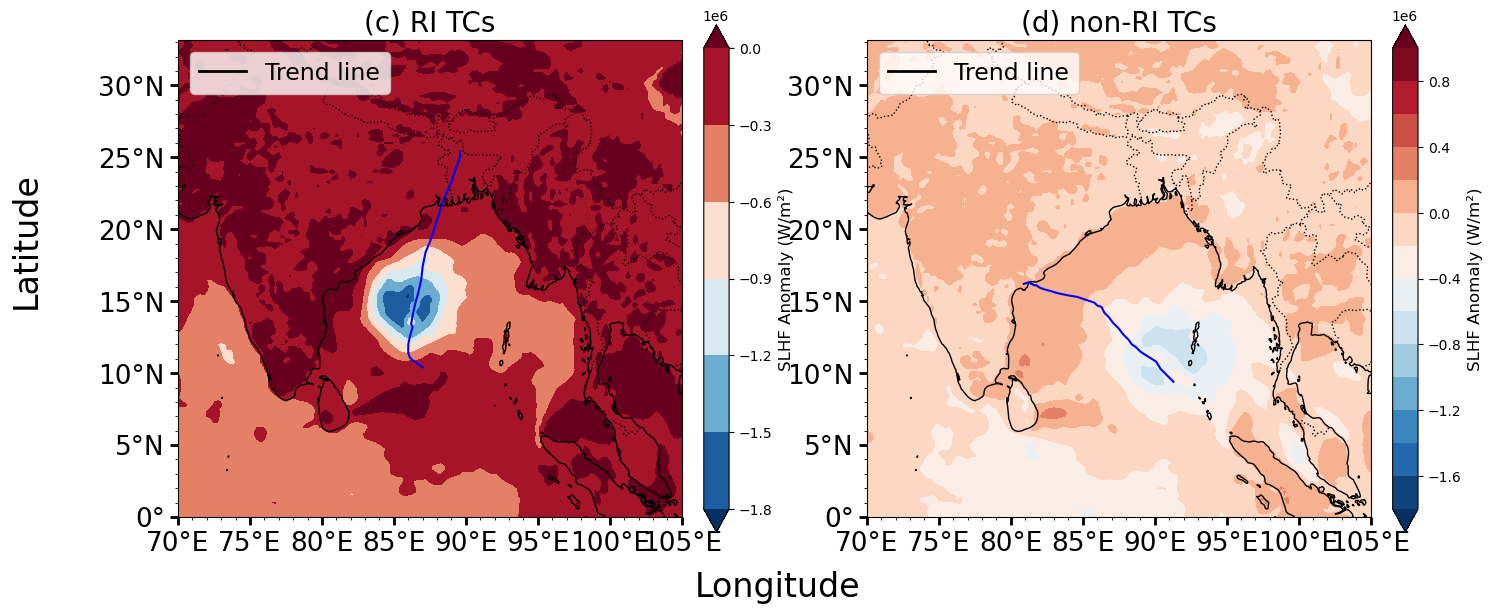

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm
import xarray as xr
from scipy.stats import ttest_1samp
import matplotlib.ticker as ticker
import pandas as pd
import cftime
import matplotlib.gridspec as gridspec
import seaborn as sns
# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 105
lat_min, lat_max = 0, 32
####################################################################################################################
#Premonsoon RI
# Define track data for multiple cyclones
cyclone_tracks1 = [
{
        'name': 'Fani',
        'intensification_range': (23,38),  # Add the rapid intensification range for Cyclone here
        'track': [(2.7, 89.7),(2.7, 89.7), (3.0, 89.4), (3.1, 89.3), (3.2, 89.2), (3.45, 89), (3.7, 88.8), (4.1, 88.8), (4.5, 88.8),
 (4.9, 88.7), (5.2, 88.6), (5.4, 88.5), (5.9, 88.5),(6.3, 88.5), (6.6, 88.2), (6.9, 87.9), (7.3, 87.9), 
 (7.3, 87.9), (7.4, 87.8), (7.7, 87.5), (8.2, 87.0),(8.3, 86.9), (8.4, 86.9), (8.5, 86.9), (8.6, 86.9),
 (8.7, 86.9), (9.2, 86.9), (9.7, 86.8), (10.1, 86.7), (10.4, 86.7), (10.8, 86.6), (11.1, 86.5), (11.7, 86.5),
 (12.3, 86.2), (12.6, 85.7), (13.0, 85.3), (13.3, 84.7), (13.4, 84.5), (13.5, 84.4), (13.6, 84.2), (13.9, 84.0),
 (14.1, 83.9), (14.2, 83.9), (14.5, 84.1), (14.9, 84.1), (15.1, 84.1), (15.2, 84.1), (15.5, 84.2), (15.9, 84.5),
 (16.2, 84.6), (16.7, 84.8), (17.1, 84.8), (17.5, 84.8), (17.8, 84.9), (18.2, 85.0), (18.6, 85.2), (19.1, 85.5),
 (19.6, 85.7), (20.2, 85.9), (20.6, 86.0), (21.1, 86.5), (21.5, 86.7), (21.9, 87.1), (22.5, 87.9), (23.1, 88.2),
 (23.6,  88.8), (24.3, 89.3),(24.75,90.0), (25.2, 90.7),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Amphan',
        'intensification_range': (16,29),  # Add the rapid intensification range for Cyclone here
        'track': [(10.4, 87.0), (10.7, 86.5), (10.9, 86.3), (10.9, 86.3), (10.9, 86.3), (11.0, 86.2), (11.1, 86.1), (11.3, 86.1), 
 (11.4, 86.0), (11.4, 86.0), (11.5, 86.0), (11.7, 86.0), (12.0, 86.0), (12.8, 86.2), (12.5, 86.1), (12.9, 86.4), 
 (13.2, 86.3), (13.3, 86.2), (13.4, 86.2), (13.7, 86.2), (14.0, 86.3), (14.5, 86.4), (14.9, 86.5), (15.2, 86.6), 
 (15.6, 86.7), (16.0, 86.8), (16.5, 86.9), (17.0, 86.9), (17.4, 87.0), (18.1, 87.1), (18.4, 87.2), (18.7, 87.2), 
 (19.1, 87.5), (19.8, 87.7), (20.6, 88.0), (21.4, 88.1), (21.9, 88.4), (22.7, 88.6), (23.3, 89.0), (24.2, 89.0), 
 (24.2, 89.3), (24.7, 89.5), (25.0, 89.6), (25.2,89.6), (25.4, 89.6),] # Add the track data for Cyclone here
       
    },    
{
        'name': 'Mocha',
        'intensification_range': (10,34),  # Add the rapid intensification range for Cyclone here
        'track': [(8.3, 89.5),(8.4,89.4), (8.5, 89.3),(8.5,89.15), (8.5, 89.0), (8.8, 88.9), (9.1, 88.7),(9.55,88.55), (10.0, 88.4),(10.4,88.3), (10.8, 88.2),(11,88.15), (11.2, 88.1),
 (11.4, 88.0), (11.6, 88.0), (11.8, 88.0), (12.2, 88.0), (12.5, 88.1), (12.7, 88.1), (12.9, 88.1), (13.2, 88.1),
 (13.6, 88.2), (14.0, 88.3), (14.3, 88.4), (14.6, 88.6), (14.8, 88.7), (15.1, 88.8), (15.2, 88.9), (15.4, 89.1),
 (15.7, 89.5), (16.0, 90.0), (16.4, 90.3), (16.9, 90.8), (17.4, 90.9), (17.9, 91.0), (18.3, 91.3), (18.7, 91.5),
 (19.3, 91.9), (19.9, 92.5), (20.5, 92.9), (21.1, 93.3), (21.8, 93.8), (22.7, 94.6), (23.5, 95.3), (23.9, 97.8),
 ] # Add the track data for Cyclone here
       
    }, 
{
        'name': 'Mala',
        'intensification_range': (17,32),  # Add the rapid intensification range for Cyclone here
        'track': [(9.5, 90.5), (9.5, 90.5), (9.5, 90.0), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.0, 89.5), (10.5, 89.0), (10.5, 89.0),
 (11.0, 89.0), (11.0, 89.5), (11.5, 90.0), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.0, 90.5), (12.5, 90.5), (12.5, 90.5),
 (12.5, 90.5), (13.0, 90.5), (13.0, 90.5), (13.0, 90.5), (13.5, 90.5), (14.0, 91.0), (14.5, 91.5), (15.0, 92.0), (15.3, 92.3), 
 (15.5, 92.5), (16.0, 93.0), (16.0, 93.0), (16.5, 93.5), (16.5, 93.5), (17.0, 94.0), (17.5, 94.5), (18.0, 95.0), (18.5, 95.5),
 (18.5, 95.5), (19.0, 96.0),] # Add the track data for Cyclone here
       
    },
{
        'name': 'Nargis',
        'intensification_range':  (2,10),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0, 87.0), (12.0, 87.0), (12.0, 86.5), (12.0, 86.5), (12.0, 86.5), (12.5, 86.0), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5),
        (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.0, 85.5), (13.5, 85.5), (13.5, 85.5), 
        (13.5, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 85.5), (14.0, 86.0), (14.0, 86.0), (14.5, 86.5), (14.5, 86.5), (14.5, 87.0), 
        (14.5, 87.0), (15.0, 87.5), (15.0, 87.5), (15.0, 87.5), (15.5, 88.0), (15.5, 89.0), (16.0, 89.5), (16.0, 90.0), (16.0, 90.5), 
        (16.0, 91.0), (16.0, 91.5), (16.0, 92.0), (16.0, 92.5), (16.0, 93.0), (16.0, 93.5), (16.0, 94.0), (16.0, 94.3), (16.0, 95.0), 
        (16.5, 95.5), (16.5, 95.5), (16.5, 95.5), (17.0, 96.0), (17.5, 96.5), (18.0, 97.0),]
     
   },
{
        'name': 'Giri',
        'intensification_range': (0,16),  # Add the rapid intensification range for Cyclone here
        'track': [(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(18.0,92),(18.0,92),
 (18.0,92.0),(18.5,92.5),(18.5,92.5),(19.0,93),(19.0,93),(19.5,93.5),(19.8,93.5),(20.0,93.5),
 (20.5,94),(20.5,94),(21.0,94.5),(21.5,95),(22.0,95.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Phailin',
        'intensification_range': (9,28),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0,96.0),(12.0,95.5),(12.0,95),(12.0,94.5),(12.25,94.25),(12.5,94.0),(13.0,93.5),(13.0,93.5),(13.0,93.0),(13.5,92.5),
 (13.5,92.5),(13.6,92.5),(14.0,92.0),(14.0,92.0),(14.5,91.5),(14.5,91.0),(15.0,90.5),(15.0,90.5),
 (15.5,90.0),(15.5,90.0),(15.5,89.5),(15.5,89.0),(16.0,88.5),(16.0,88.5),(16.2,88.3),(16.5,88.0),
 (16.8,87.7),(16.9,87.2),(17.0,87.0),(17.1,86.8),(17.5,86.5),(17.8,86.0),(18.1,85.7),(18.6,85.4),
 (18.7,85.2),(19.1,85.2),(19.5,84.8),(20.0,84.5),(20.5,84.5),(21.0,84.0),(21.5,84.0),(21.8,83.8),
 (22.5,83.8),(22.75,83.65),(23.0,83.5),(23.25,83.75),(23.5,84.0),(24.0,84.1),(24.5,84.2),]  # Add the track data for Cyclone 
       
    },
{
        'name': 'Madi',
        'intensification_range': (0,13),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0,84.0),(10.0,84.0),(10.1,84.0),(10.2,84.0),(10.3,84.0),(10.4,84.0),(10.45,84.05),(10.5,84.1),(10.5,84.1),(10.7,84.2),(10.8,84.3),
 (11.0,84.4),(11.0,84.5),(11.2,84.5),(11.5,84.6),(11.8,84.6),(12.0,84.6),(12.3,84.7),(12.6,84.7),
 (13.0,84.7),(13.2,84.7),(13.4,84.7),(13.6,84.7),(13.8,84.7),(14.0,84.7),(14.3,84.7),(14.4,84.7),
 (14.6,84.7),(14.7,84.7),(14.8,84.8),(14.8,84.8),(15.0,85.0),(15.3,85.3),(15.4,85.3),(15.7,85.3),
 (15.4,85.0),(15.1,84.8),(14.9,84.7),(14.6,84.6),(14.3,84.2),(14.0,83.8),(13.7,83.5),(13.5,83.4),
 (13.3,83.3),(13.1,83.5),(12.9,82.7),(12.7,82.35),(12.5,82.0),(12.0,81.5),(11.5,81.2),(11.0,80.7),(10.5,80.0),(10.25,78.9),
 (10.0,78.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Hudhud',
        'intensification_range': (33,42),  # Add the rapid intensification range for Cyclone here
        'track': [(11.5, 95.0), (11.7, 94.8), (11.85,94.4),(12.0, 94.0), (12.0,93.75),(12.0, 93.5),(12.1,93.25), (12.2, 93.0), (12.3, 92.9), (12.5, 92.5), (12.7, 91.7),
 (12.8, 91.0), (13.0, 90.5), (13.2, 90.2), (13.5, 89.6), (13.7, 89.2), (13.8, 89.0), (13.9, 88.8), (14.6, 88.6),
 (14.1, 88.4), (14.1, 88.1), (14.1, 87.9), (14.3, 87.7), (14.4, 87.6), (14.7, 87.2), (14.8, 87.0), (15.0, 86.8),
 (15.2, 86.7), (15.4, 86.5), (15.5, 86.4), (15.7, 86.1), (15.9, 85.7), (16.0, 85.4), (16.1, 85.1), (16.1, 85.0),
 (16.2, 84.8), (16.2, 84.8), (16.4, 84.7), (16.7, 84.4), (17.2, 84.2), (17.4, 83.8), (17.6, 83.4), (17.8, 83.0),
 (18.0, 82.7), (18.3, 82.5), (18.7, 82.3), (18.7, 82.3), (19.5, 81.5), (20.5, 81.5), (20.7, 81.5),(21.0,81.5), (21.3, 81.5),(21.8,81.5),
 (22.3, 81.5),(23.55,81.5), (24.8, 81.5), (25.1, 81.6), (25.6, 81.7), (26.3, 81.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Titli',
        'intensification_range': (8,23),  # Add the rapid intensification range for Cyclone here
        'track': [(14.0, 88.8), (14.0, 88.8),(14.15,88.5), (14.3, 88.2),(14.4,87.9), (14.5, 87.6),(14.6,87.35), (14.7, 87.1), (14.7, 86.9), (14.8, 86.7), (14.9, 86.6),
 (15.1, 86.4), (15.3, 86.2), (15.5, 86.0), (15.7, 85.8), (16.0, 85.8), (16.5, 85.8), (17.0, 85.6), (17.3, 85.4),
 (17.5, 85.3), (17.7, 85.2), (18.2, 85.1), (18.6, 84.7), (18.8, 84.4), (19.0, 84.1), (19.3, 83.8), (19.6, 83.8), 
 (19.9, 83.7), (20.1, 84.0), (20.3, 84.3),(20.4,84.5), (20.5, 84.7), (20.6, 84.9), (20.8, 85.2), (20.9, 85.5), (21.2, 86.1), (21.55,86.65),
 (21.9, 87.2), (22.1, 87.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Bulbul',
        'intensification_range': (6,18),  # Add the rapid intensification range for Cyclone here
        'track': [(13.1, 91.5), (13.1, 91.0), (13.1, 90.7),(13.15,90.4), (13.2, 90.1),(13.25,89.95), (13.3, 89.8),(13.35,89.75), (13.4, 89.7), (13.4, 89.6), (13.4, 89.4),
 (13.45,89.35),(13.5, 89.3),(13.65,89.3), (13.8, 89.3),(14.0,89.3), (14.2, 89.3), (14.7, 89.3), (15.3, 88.7), (15.5, 88.4), (15.9, 88.0), (16.2, 87.9), 
 (16.4, 87.8), (16.6, 87.7), (16.9, 87.6), (17.2, 87.6), (17.6, 87.6), (18.1, 87.6), (18.5, 87.6), (19.2, 87.7), 
 (19.3, 87.6), (19.6, 87.7), (20.0, 87.6), (20.4, 87.6), (20.6, 87.8), (20.9, 87.9), (21.2, 88.1), (21.4, 88.3), 
 (21.6, 88.6), (21.9, 89.1), (22.1, 89.5), (22.2, 89.7), (22.3, 90.0), (22.4, 90.1), (22.5, 90.4),(22.6,90.8),(22.7, 91.2), (22.9,91.55),
 (23.1, 91.9),] # Add the track data for Cyclone here
       
    },  
{
        'name': 'Sidr',
        'intensification_range':  (1,18),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0, 92.0), (10.0, 92.0), (10.0, 92.0), (10.5, 91.5), (10.5, 91.5), (10.5, 91.5), (10.5, 91.0), (11.0, 90.5), (11.0, 90.5),
      (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (12.0, 89.5), (12.0, 89.5), (12.0, 89.5), (13.0, 89.5), (13.0, 89.5),
      (13.0, 89.5), (13.5, 89.5), (14.0, 89.5), (14.5, 89.5), (14.5, 89.5), (15.0, 89.5), (15.5, 89.5), (16.0, 89.0), (16.0, 89.0), 
      (16.5, 89.0), (17.0, 89.0), (17.5, 89.0), (18.0, 89.0), (19.5, 89.0), (20.0, 89.0), (21.0, 89.0), (21.5, 89.5), (22.5, 90.5), 
      (23.5, 91.0), (23.5, 91.0), (24.5, 91.5),]
     
    },


    
    # Add more cyclone track data lists as needed
]

# Convert date strings to datetime objects
start_date_amphan = cftime.DatetimeGregorian(2020,5,18)
end_date_amphan = cftime.DatetimeGregorian(2020, 5, 19)
start_date_mocha = cftime.DatetimeGregorian(2023, 5, 11)
end_date_mocha = cftime.DatetimeGregorian(2023, 5, 12)
start_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
end_date_mala = cftime.DatetimeGregorian(2006, 4, 28)
start_date_fani = cftime.DatetimeGregorian(2019, 4, 29)
end_date_fani = cftime.DatetimeGregorian(2019, 4, 30)
start_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
end_date_nargis = cftime.DatetimeGregorian(2008, 4, 27)
start_date_giri = cftime.DatetimeGregorian(2010,10,20)
end_date_giri= cftime.DatetimeGregorian(2010, 10, 21)
start_date_phailin = cftime.DatetimeGregorian(2013, 10, 10)
end_date_phailin = cftime.DatetimeGregorian(2013, 10, 11)
start_date_madi = cftime.DatetimeGregorian(2013, 12, 6)
end_date_madi = cftime.DatetimeGregorian(2013, 12, 7)
start_date_hudhud = cftime.DatetimeGregorian(2014, 10, 10)
end_date_hudhdud= cftime.DatetimeGregorian(2014, 10, 10)
start_date_titli = cftime.DatetimeGregorian(2018, 10, 9)
end_date_titli = cftime.DatetimeGregorian(2018, 10, 10)
start_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
end_date_bulbul = cftime.DatetimeGregorian(2019, 11, 7)
start_date_sidr = cftime.DatetimeGregorian(2007, 11, 12)
end_date_sidr = cftime.DatetimeGregorian(2007, 11, 13)
# Load the dataset
slhf_data = xr.open_dataset('/DISK-0/gokul/ENGY/data/slhf_2005-2023.nc')



# Access the SLHF variable (replace 'SLHF_variable_name' with the actual variable name)
slhf_variable = slhf_data['slhf']

# Calculate the mean across the time dimension
slhf_mean = slhf_variable.mean(dim='time')
# Print the resulting mean dataset
print(slhf_mean)
slhf_amphan = slhf_data.sel(time=slice(str(start_date_amphan), str(end_date_amphan)))
slhf_mocha = slhf_data.sel(time=slice(str(start_date_mocha), str(end_date_mocha)))
slhf_mala = slhf_data.sel(time=slice(str(start_date_mala), str(end_date_mala)))
slhf_fani = slhf_data.sel(time=slice(str(start_date_fani), str(end_date_fani)))
slhf_nargis = slhf_data.sel(time=slice(str(start_date_nargis), str(end_date_nargis)))
slhf_giri = slhf_data.sel(time=slice(str(start_date_giri), str(end_date_giri)))
slhf_phailin = slhf_data.sel(time=slice(str(start_date_phailin), str(end_date_phailin)))
slhf_madi = slhf_data.sel(time=slice(str(start_date_madi), str(end_date_madi)))
slhf_hudhud = slhf_data.sel(time=slice(str(start_date_hudhud), str(end_date_hudhdud)))
slhf_titli = slhf_data.sel(time=slice(str(start_date_titli), str(end_date_titli)))
slhf_bulbul = slhf_data.sel(time=slice(str(start_date_bulbul), str(end_date_bulbul)))
slhf_sidr = slhf_data.sel(time=slice(str(start_date_sidr), str(end_date_sidr)))



# Concatenate the selected cyclone events along the time axis
slhf_combined = slhf_amphan

# Calculate the mean SLHF across the combined time axis
slhf_total_mean = slhf_combined.mean(dim='time')

print("Total SLHF Mean Across Cyclone Events:")
print(slhf_total_mean)

# Calculate the anomaly (difference between total mean across cyclone events and overall mean)
slhf_anomaly = slhf_total_mean - slhf_mean

print("SLHF Anomaly:")
print(slhf_anomaly)
slhf_anomaly_da = slhf_anomaly['slhf']


################################################################################################################
# Premonsoon Non-RI
# Define track data for multiple cyclones
cyclone_tracks2 = [
{
        'name': 'Asani',
        'track': [(9.4, 91.3),(9.85,90.85), (10.3, 90.4),(10.55,90.25), (10.8, 90.1),(11.05,89.7), (11.3, 89.3), (11.5, 89.0),
         (11.8, 88.7), (12.0, 88.4), (12.3, 88.2), (12.7, 87.8), (13.1, 87.5), (13.5, 87.1), (13.9, 86.8),
         (14.2, 86.5), (14.6, 86.3), (14.7, 86.0), (14.9, 85.8), (15.0, 85.5), (15.1, 85.2), (15.2, 84.9),
         (15.3, 84.6), (15.4, 84.0), (15.5, 83.5), (15.6, 83.1), (15.7, 82.8), (15.8, 82.4), (15.9, 82.1),
         (16.0, 81.9), (16.1, 81.8), (16.1, 81.6), (16.2, 81.5), (16.2, 81.4), (16.3, 81.4), (16.3, 81.3),
         (16.3, 81.2),(16.25,81.05), (16.2, 80.9),]
    },
{
        'name': 'Yaas',
        'track': [(16.1, 90.2),(16.15,90.05), (16.2, 89.9),(16.25,89.8), (16.3, 89.7), (16.3, 89.7), (16.3, 89.7), 
      (16.5, 89.6), (16.4, 89.6), (16.8, 89.5), (17.1, 89.3), (17.4, 89.2), (17.6, 89.0), (17.8, 88.9),
      (18.0, 88.6), (18.3, 88.3), (18.7, 88.0), (19.1, 88.1), (19.5, 88.0), (19.8, 87.9), (20.1, 87.8), 
      (20.4, 87.6), (20.8, 87.3), (21.2, 87.1), (21.4, 86.9), (21.6, 86.7), (21.8, 86.6), (22.2, 86.2), 
      (22.5, 86.0),(22.65,85.9), (22.8, 85.8), (23.1, 85.7), (23.5, 85.6),(23.9,85.45), (24.3, 85.3),(24.45,85.05), 
      (24.7, 84.8),]
       
    },
{
        'name': 'Mora',
        'track': [(14.0, 88.5), (14.5, 89.5), (15.0, 90.0), (15.4, 90.5), (15.7, 90.7), (16.0, 91.0), (16.3, 91.2),
      (16.6, 91.3), (17.0, 91.3), (17.3, 91.3), (17.8, 91.4), (18.3, 91.5), (18.6, 91.5), (18.8, 91.5), 
      (20.0, 91.6), (20.3, 91.6), (21.1, 91.8), (21.8, 91.9), (22.8, 91.9), (23.6, 92.1), (24.2, 92.2), 
      (24.75,92.3), (25.3, 92.4),]
    },

{
        'name': 'Laila',
        'track': [(10.5,88.5),(10.75,88.25),(11.0,88.0),(11.25,87.75),(11.5,87.5),(11.5,87),(11.5,86.5),(12.0,85.5),(12.5,84.5),(13.0,84.0),(13.0,83.5),
       (13.0,83.0),(13.0,82.5),(13.0,82.0),(13.5,82.0),(13.5,82.0),(13.5,81.5),(14.0,81.5),(14.0,81.5),
       (14.0,81.5),(14.5,81.0),(14.5,81.0),(15.0,81.0),(15.5,80.5),(15.7,80.5),(15.8,80.5),(16.0,80.5),
       (16.0,80.5),(16.0,80.5),(16.0,80.7),(16.2,80.8),(16.5,81.0),(17.0, 81.5),]
     
   },
{
        'name': 'Aila',
        'track': [(16.5, 88.0), (16.5, 88.0), (16.5, 88.0), (16.75, 88.25), (17.0, 88.5), (17.0, 88.5), (17.0, 88.5),
      (18.0, 88.5), (18.0, 88.5), (18.0, 88.5), (18.5, 88.5), (19.0, 88.5), (19.0, 88.5), (20.0, 88.0), 
      (20.0, 88.0), (20.5, 88.0), (21.5, 88.0), (22.0, 88.0), (22.5, 88.0), (23.0, 88.0), (23.5, 88.0), 
      (24.0, 88.0), (25.0, 88.0), (25.5, 88.0), (27.0, 88.5),]

     
   },
{
        'name': 'Mandous',
        'track': [(8.2, 88.2),(8.3,87.6), (8.4, 87.0), (8.6, 86.3), (8.7, 85.7), (8.7, 85.5),(8.8,85.25),
           (8.9, 85.0),(9.05,84.8), (9.2, 84.6), (9.3, 84.4), (9.4, 84.1), (9.5, 83.8), (9.7, 83.5),
           (9.8, 83.2), (10.1, 82.9), (10.4, 82.6), (10.6, 82.3), (10.7, 82.0), (11.0, 81.7), (11.1, 81.5),
           (11.4, 81.3), (11.7, 81.0), (12.0, 80.8), (12.2, 80.6), (12.5, 80.3), (12.8, 80.0), (12.9, 79.7),
           (12.8, 79.5), (12.7, 79.3),]
    },
{
        'name': 'Nivar',
        'track': [(8.5, 85.3), (9.3, 84.5), (9.5, 84.2), (9.6, 84.0),(9.7,83.8), (9.8, 83.6),(9.9,83.45), (10.0, 83.3),
       (10.0,83.15), (10.0, 83.0), (10.0, 83.0), (10.0, 82.7), (10.0, 82.6), (10.1, 82.5), (10.1, 82.4), (10.2, 82.3),
       (10.3, 82.2), (10.5, 82.0), (10.7, 81.7), (11.0, 81.3), (11.2, 81.0), (11.4, 80.7), (11.7, 80.4),
       (12.0, 80.1), (12.1, 79.9), (12.3, 79.7), (12.6, 79.4), (12.9, 79.3), (13.3, 79.3), (13.6, 79.4), 
       (13.8,79.5), (14.0, 79.6),]
       
    },
{
        'name': 'Phethai',
        'track': [(6.5, 88.7), (6.7, 88.6), (6.8, 88.5),(7.05,88.35), (7.3, 88.2), (7.45,88.1), (7.6, 88.0),(7.9,87.8), (8.2, 87.6), (8.5, 87.4), (8.5, 87.4),(8.55,87.1),
        (8.6, 86.8), (8.7,86.5), (8.8, 86.2), (8.9,85.75), (9.0, 85.5), (9.2, 85.2), (9.4, 85.1), (9.85,85), (10.3, 84.9), (10.7, 84.7), (11.0, 84.6), (11.1, 84.5), (11.3, 84.3), 
        (11.8, 84.1), (12.2, 83.9), (12.6,83.6), (13.3, 83.0), (13.8, 82.7), (14.0, 82.5), (14.5, 82.2), (15.2, 82.2), (15.8, 82.2), (16.2, 82.2), 
        (16.7, 82.3), (16.9, 82.4), (17.3, 82.5), (17.5, 82.5),]
       
    },
{
        'name': 'Gaja',
        'track':[(11.7, 92.5), (12.0, 92.0), (12.3,92.4), (12.6, 90.8), (12.8,93.5), (13.0, 89.9), (13.2,89.6), (13.4, 89.3), (13.5, 88.9),
      (13.5, 88.5), (13.5, 88.2), (13.5, 88.0), (13.5, 87.7), (13.4, 87.4), (13.5, 87.2), (13.3, 87.1), (13.1, 87.0),
      (12.9, 86.9), (12.9, 86.9), (12.6, 87.3), (12.9, 87.5), (13.2, 87.5), (13.2, 87.3), (13.2, 87.2), (13.3, 87.1), 
      (13.5, 86.6), (13.4, 86.4), (13.4, 86.0), (13.2, 85.8), (13.2, 85.6), (13.1, 85.5), (13.1, 85.3), (13.0, 85.1), 
      (12.8, 84.8), (12.6, 84.6), (12.4, 84.2), (12.2, 84.2), (12.0, 83.8), (11.8, 83.4), (11.5, 83.2), (11.3, 82.6),
      (11.2, 82.0), (11.0, 81.5), (10.8, 81.2), (10.6, 80.7), (10.5, 80.3), (10.4, 79.7), (10.4, 79.2), (10.4, 78.5), 
      (10.5, 77.6), (10.3,77), (10.1, 76.4), (10,75.85), (9.9, 75.3), (9.85,74.8), (9.8, 74.3), (9.8, 73.7), (9.8, 73.2),
      (9.85,72.45), (9.9, 71.7), (10,71.1), (10.1, 70.5), (10.2,70.05), (10.3, 69.6), (10.4, 69.4), (10.5, 69.0), (10.6,68.75),(10.7, 68.5),
      (10.75,68), (10.8, 67.5),(10.9,67.05), (11.0, 66.6), (11.1, 66.3), (11.2, 65.8), (11.2, 65.4), (11.2, 65.0),]

       
    },
{
        'name': 'Vardah',
        'track': [(8.5, 91.0), (8.5, 90.5), (9,90.5), (9.5, 90.5), (9.65,90.5), (9.8, 90.5), 
        (9.8, 90.5), (9.8, 90.5), (9.9,90.5), (10.0, 90.5), (10.4,90.5), (10.8, 90.5),
        (11,90.5), (11.2, 90.5), (11.5, 90.5), (11.5, 90.5), (11.5, 90.5), (11.7, 90.5),
        (11.7, 90.5), (11.8, 90.5), (12.0, 90.5), (12.0, 90.4), (12.1, 90.4), (12.1, 90.3),
        (12.2, 90.3), (12.2, 90.0), (12.2, 89.9), (12.3, 89.6), (12.5, 89.0), (12.6, 88.4),
        (12.7, 88.0), (13.0, 87.4), (13.1, 86.8), (13.2, 86.4), (13.3, 85.9), (13.3, 85.3), 
        (13.3, 85.0), (13.3, 84.7), (13.1, 84.3), (13.1, 83.7), (13.1, 83.3), (13.3, 83.0), 
        (13.3, 82.5), (13.1, 82.3), (13.2, 81.9), (13.2, 81.6), (13.2, 81.2), (13.2, 80.7), 
        (13.1, 80.3), (13.0, 79.9), (12.9, 79.5), (12.7, 79.1), (12.6,78.55), (12.5, 78.0),]

       
    },    
{
        'name': 'Lehar',
        'track':[(8.5,96.5),(8.75,96.25) ,(9.0,96.0),(9.5,95.5), (10.0,95.0),(10.0,95.0),(10.5,94.5),(10.7,94.0),(11.0,93.5),(11.0,93.5),
       (11.5,93.0),(11.5,92.5),(12.0,92.5),(12.0,92),(12.0,91.5),(12.0,91.5),(12.5,91.5),(12.5,91.0),(12.5,91.0),
       (12.5,91.0),(12.5,90.5),(12.5,90.0),(12.5,89.5),(13.0,89.0),(13.0,88.5),(13.0,88.5),(13.1,88.0),
       (13.2,87.5),(13.5,87.0),(13.5,86.5),(14.0,86.0),(14.0,85.5),(14.5,85.0),(14.5,84.5),(15.0,84.0),
       (15.0,83.5),(15.5,82.0),(15.7,81.7),(15.7,81.3),(15.9,81.0),(16.0,80.8),]
       
    }, 
{
        'name': 'Helen',
        'track': [(14.5, 86.5), (14.5, 86.0), (14.5, 85.5), (14.75, 85.25), (15.0, 85.0), (15.0, 85.0), (15.0, 84.5),
       (15.0, 84.25), (15.0, 84.0), (15.0, 84.0), (15.2, 84.0), (15.2, 84.0), (15.3, 83.9), (15.3, 83.9),
       (15.4, 83.7), (15.5, 83.6), (15.6, 83.5), (15.8, 83.4), (15.9, 83.3), (16.0, 83.1), (16.1, 82.9),
       (16.1, 82.7), (16.2, 82.7), (16.2, 82.3), (16.2, 81.9), (16.2, 81.7), (16.2, 81.3), (16.1, 81.2),
       (15.9, 80.7), (15.9, 80.55),(15.9, 80.4),]
    },
{
        'name': 'Thane',
        'track':[(8.5,88.5), (8.75,88.25), (09.0,88.0),(9.25,87.75),(09.5,87.5),(09.5,87.5), (10.0,87.5),(10.25,87.5),
       (10.5,87.5),(10.75, 87.5), (11.0,87.5),(11.0,87.5),(11.5,87.5),(12.0,87.0),(12.0,87.0),(12.2,86.7),(12.5,86.5),
       (12.5,86.5),(12.5,86.0),(12.5,86.0),(12.5,85.5),(12.5,85.5),(12.5,85.0),(12.5,85.0),(12.5,84.5),
       (12.5,84.0),(12.5,84.0),(12.5,83.5),(12.3,83.0),(12.0,82.5),(12.0,82.0),(12.0,81.7),(12.0,81.3),
       (12.0, 81.0),(11.8,80.6), (11.8, 80.3), (11.6, 79.9), (11.6, 79.5), (11.6 ,79.0), (11.6, 78.6), 
       (11.6, 78.2),]
     
    },
{
        'name': 'Jal',
        'track': [(8.0,92.0),(8.5,91.0),(8.5,90.5),(8.5,90.25),(8.5,90.0),(8.5,89.75),(8.5,89.5),(8.75,89),(9.0,88.5),(9.0,88.0), (9.0,87.5),(9.0,87.5),
     (9.5,87.0),(9.5,87.0),(10.0,86.5),(10.0,86.0),(10.0,85.5),(10.0,85.5),(10.0,85.0),(10.0,85.0),
     (11.0,84.5),(11.0,84.5),(11.0,84.0),(11.0,84.0),(11.0,83.5),(12.0,83.0),(12.0,82.5),(12.0,81.5),
     (13.0,81.0),(13.0,80.5),(13.0,80.0), (13.5,79.5), (14.0,79.0),(15.0,78.0),]

     
   },

    
    # Add more cyclone track data lists as needed
]
# Convert date strings to datetime objects
start_date_asani = cftime.DatetimeGregorian(2022,5,7)
end_date_asani= cftime.DatetimeGregorian(2022, 5, 8)
start_date_yaas = cftime.DatetimeGregorian(2021, 5, 23)
end_date_yaas = cftime.DatetimeGregorian(2021, 5, 24)
start_date_mora = cftime.DatetimeGregorian(2017, 5, 28)
end_date_mora = cftime.DatetimeGregorian(2017, 5, 29)
start_date_laila = cftime.DatetimeGregorian(2010, 5, 17)
end_date_laila = cftime.DatetimeGregorian(2010, 5, 18)
start_date_aila = cftime.DatetimeGregorian(2009, 5, 23)
end_date_aila = cftime.DatetimeGregorian(2009, 5, 24)
start_date_mandous = cftime.DatetimeGregorian(2022,12,6)
end_date_mandous = cftime.DatetimeGregorian(2022, 12, 7)
start_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
end_date_nivar = cftime.DatetimeGregorian(2020, 11, 24)
start_date_phethai = cftime.DatetimeGregorian(2018, 12, 14)
end_date_phethai = cftime.DatetimeGregorian(2018, 12, 15)
start_date_gaja = cftime.DatetimeGregorian(2018,11, 11)
end_date_gaja = cftime.DatetimeGregorian(2018,11, 12)
start_date_vardah = cftime.DatetimeGregorian(2016, 12, 10)
end_date_vardah = cftime.DatetimeGregorian(2016, 12, 11)
start_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
end_date_lehar = cftime.DatetimeGregorian(2013, 11, 25)
start_date_helen = cftime.DatetimeGregorian(2013, 11, 19)
end_date_helen = cftime.DatetimeGregorian(2013, 11, 20)
start_date_thane = cftime.DatetimeGregorian(2011, 12, 26)
end_date_thane = cftime.DatetimeGregorian(2011, 12, 27)
start_date_jal = cftime.DatetimeGregorian(2010, 11, 5)
end_date_jal = cftime.DatetimeGregorian(2010, 11, 6)
# Load the slhf data from the downloaded NetCDF file

slhf_asani = slhf_data.sel(time=slice(str(start_date_asani), str(end_date_asani)))
slhf_yaas = slhf_data.sel(time=slice(str(start_date_yaas), str(end_date_yaas)))
slhf_mora = slhf_data.sel(time=slice(str(start_date_mora), str(end_date_mora)))
slhf_laila = slhf_data.sel(time=slice(str(start_date_laila), str(end_date_laila)))
slhf_aila = slhf_data.sel(time=slice(str(start_date_aila), str(end_date_aila)))
slhf_mandous = slhf_data.sel(time=slice(str(start_date_mandous), str(end_date_mandous)))
slhf_nivar= slhf_data.sel(time=slice(str(start_date_nivar), str(end_date_nivar)))
slhf_phethai = slhf_data.sel(time=slice(str(start_date_phethai), str(end_date_phethai)))
slhf_gaja = slhf_data.sel(time=slice(str(start_date_gaja), str(end_date_gaja)))
slhf_vardah = slhf_data.sel(time=slice(str(start_date_vardah), str(end_date_vardah)))
slhf_lehar = slhf_data.sel(time=slice(str(start_date_lehar), str(end_date_lehar)))
slhf_helen = slhf_data.sel(time=slice(str(start_date_helen), str(end_date_helen)))
slhf_thane = slhf_data.sel(time=slice(str(start_date_thane), str(end_date_thane)))
slhf_jal = slhf_data.sel(time=slice(str(start_date_jal), str(end_date_jal)))

#Concatenate the selected cyclone events along the time axis
slhf_combined = slhf_asani

# Calculate the mean SLHF across the combined time axis
slhf_total_meannri = slhf_combined.mean(dim='time')

print("Total SLHF Mean Across Cyclone Events:")
print(slhf_total_meannri)

# Calculate the anomaly (difference between total mean across cyclone events and overall mean)
slhf_anomalynri = slhf_total_meannri - slhf_mean

print("SLHF Anomaly:")
print(slhf_anomalynri)
slhf_anomalynri_da = slhf_anomalynri['slhf']





# Create a new figure with two subplots
fig = plt.figure(figsize=(16, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.25)
####################################################################################################################################
# Subplot 1: Cyclone Tracks and slhf slhfaly
ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_extent([lon_min, lon_max, lat_min, lat_max])
ax1.add_feature(cfeature.LAND, facecolor='darkgrey')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for cyclone plotting and slhf slhfaly
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(slhf_anomaly_da.longitude, slhf_anomaly_da.latitude)
levels = np.linspace(-1800000, 1000000, 15) 
slhf_contour1 = ax1.contourf(lon, lat, slhf_anomaly_da, transform=ccrs.PlateCarree(), cmap='RdBu_r',extend='both')


# Provided track data
track_data = [
    (10.4, 87.0), (10.9, 86.3), (10.9, 86.3), (11.1, 86.1),
    (11.4, 86.0), (11.5, 86.0), (12.0, 86.0), (12.5, 86.1),
    (13.2, 86.3), (13.4, 86.2), (14.0, 86.3), (14.9, 86.5),
    (15.6, 86.7), (16.5, 86.9), (17.4, 87.0), (18.4, 87.2),
    (19.1, 87.5), (20.6, 88.0), (21.9, 88.4), (23.3, 89.0),
    (24.2, 89.3), (25.0, 89.6), (25.4, 89.6),
]

# Extract latitude and longitude from the track_data
lats, lons = zip(*track_data)

# Plot the track data as a sky blue line
ax1.plot(lons, lats, color='blue', transform=ccrs.PlateCarree())
   # Perform linear fit
x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Plot linear fit line
#ax1.plot(x, m*x + c, color='blue', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())






# Legend handles for custom legend entries
ri_line = mlines.Line2D([], [], color='red', linewidth=2, label='RI Phase')
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
trend_line = mlines.Line2D([], [], color='black', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax1.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax1.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax1.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax1.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax1.set_title('(c) RI TCs', fontsize=20)
from scipy.stats import ttest_1samp
import numpy as np

# Assuming slhf_slhfaly1 is your data array
sample_mean = np.mean(slhf_anomaly_da)  # Calculate sample mean
pop_mean = 0  # Assumed population mean for the test

# Perform one-sample t-test
tstat, pval = ttest_1samp(slhf_anomaly_da, pop_mean)

# Create a mask for areas of significance (assuming alpha level of 0.05)
hatch = np.where(pval < 0.05, np.nan, 0)


# Add a colorbar for the first subplot
cbar1 = plt.colorbar(slhf_contour1, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
cbar1.set_label('SLHF Anomaly (W/m²)', fontsize=12)
cbar1.ax.tick_params(labelsize=10)

#########################################################################################################################################




# Subplot 2: Mean Track Data
ax2 = plt.subplot(gs[1], projection=ccrs.PlateCarree())
ax2.set_extent([lon_min, lon_max, lat_min, lat_max])
ax2.add_feature(cfeature.LAND, facecolor='darkgrey')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
# Your existing code for mean track plotting
# Plot sea surface temperature using contourf
lon, lat = np.meshgrid(slhf_anomalynri_da.longitude, slhf_anomalynri_da.latitude)
levels = np.linspace(-1800000, 1000000, 15) 
slhf_contour2 = ax2.contourf(lon, lat, slhf_anomalynri_da, transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',extend='both')
track_data = [(9.4, 91.3),(9.85,90.85), (10.3, 90.4),(10.55,90.25), (10.8, 90.1),(11.05,89.7), (11.3, 89.3), (11.5, 89.0),
         (11.8, 88.7), (12.0, 88.4), (12.3, 88.2), (12.7, 87.8), (13.1, 87.5), (13.5, 87.1), (13.9, 86.8),
         (14.2, 86.5), (14.6, 86.3), (14.7, 86.0), (14.9, 85.8), (15.0, 85.5), (15.1, 85.2), (15.2, 84.9),
         (15.3, 84.6), (15.4, 84.0), (15.5, 83.5), (15.6, 83.1), (15.7, 82.8), (15.8, 82.4), (15.9, 82.1),
         (16.0, 81.9), (16.1, 81.8), (16.1, 81.6), (16.2, 81.5), (16.2, 81.4), (16.3, 81.4), (16.3, 81.3),
         (16.3, 81.2),(16.25,81.05), (16.2, 80.9),]

# Extract latitude and longitude from the track_data
lats, lons = zip(*track_data)

# Plot the track data as a sky blue line
ax2.plot(lons, lats, color='blue', transform=ccrs.PlateCarree())



x = np.array(lons)
y = np.array(lats)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]





trend_line = mlines.Line2D([], [], color='black', linewidth=2, label='Trend line')
legend_handles = [trend_line]
ax2.legend(handles=legend_handles, loc='upper left', fontsize=17)
# Label latitude and longitude values on the axes
ax2.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax2.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter) 
ax2.tick_params(axis='x', labelsize=19)  # Adjust font size for x-axis tick labels
ax2.tick_params(axis='y', labelsize=19)  # Adjust font size for y-axis tick labels
# Add minor ticks to both x-axis and y-axis
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.tick_params(axis='x', which='major', width=2,length=6)
plt.tick_params(axis='y', which='major', width=2,length=6)
ax2.set_title('(d) non-RI TCs', fontsize=20) 



# Add a colorbar for the second subplot
cbar2 = plt.colorbar(slhf_contour2, ax=ax2, orientation='vertical', fraction=0.046, pad=0.04)
cbar2.set_label('SLHF Anomaly (W/m²)', fontsize=12)
cbar2.ax.tick_params(labelsize=10)


##################################################################################################################################################### 
# Common x and y labels
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=24)
fig.text(0.02, 0.55, 'Latitude', va='center', rotation='vertical', fontsize=24)




# Adjust size of tick labels
cbar.ax.tick_params(axis='y', labelsize=16)
# Add the color bar without specific ticks
cbar1 = plt.cm.ScalarMappable(cmap=cm.terrain, norm=plt.Normalize(0, 1))



plt.subplots_adjust(left=0.1, right=0.9, top=.96, bottom=0.15)
plt.savefig('/DISK-0/gokul/ENGY/data/subplot/amphanslhf.png',dpi=300)
# Show the plot
plt.show()








